In [6]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.constants as const
import math
import pandas as pd

In [39]:
# Fuction definitions
def cleanAndExtractData (files, x, x_pos, y, y_pos, splitItem):
    for file in files:
        ptX=[]
        ptY=[]
        with open(file, 'r') as file:
            for line in file:
                if line.strip() and line[0].isnumeric(): # 
                    ptX.append(float(line.split(splitItem)[x_pos].strip()))
                    ptY.append(float(line.split(splitItem)[y_pos].strip()))
            x.append(ptX)
            y.append(ptY)

def linearFitAndPlot (xRange, yRange, startVal, endVal): #return x-intercept
    index = [i for i, w in enumerate(xRange) if startVal <= w <= endVal]
    xPts = xRange[index[0]:index[-1]]
    yPts = yRange[index[0]:index[-1]]
    pts = np.polyfit(xPts, yPts, 1) 
    plt.plot([-pts[1]/pts[0], min(xPts), max(xPts)],[0, pts[0] * min(xPts) + pts[1], pts[0] * max(xPts) + pts[1]], linestyle='--')
    plt.ylim(bottom=0)
    return  -(pts[1]/pts[0]) 

[]

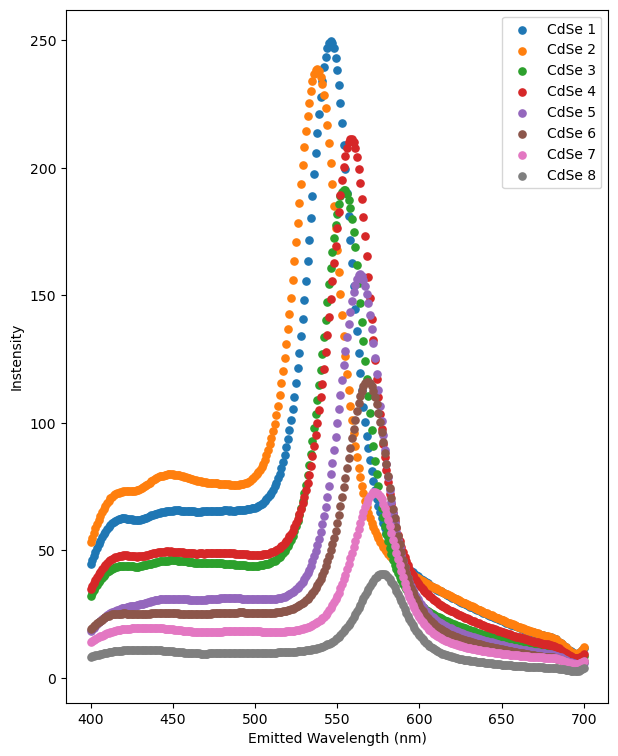

In [14]:
# Plotting full Fluorescence data 
Fluofiles = glob.glob('C:/CdSeData/ELJfl-*.txt')
emitWavelen =[ ]
intensity = []
waveLenMaxInt = [] 

fluoData = cleanAndExtractData (Fluofiles, emitWavelen, 0, intensity, 1, "\t")

plt.figure(figsize=(7,9))

for i in range(len(Fluofiles)):
    plt.scatter(emitWavelen[i], intensity[i], label=f'CdSe {i+1}', s=27) 
    plt.legend()  
    waveLenMaxInt.append(emitWavelen[i][intensity[i].index(max(intensity[i]))])
    
plt.xlabel("Emitted Wavelength (nm)")
plt.ylabel("Instensity")
plt.plot()

[]

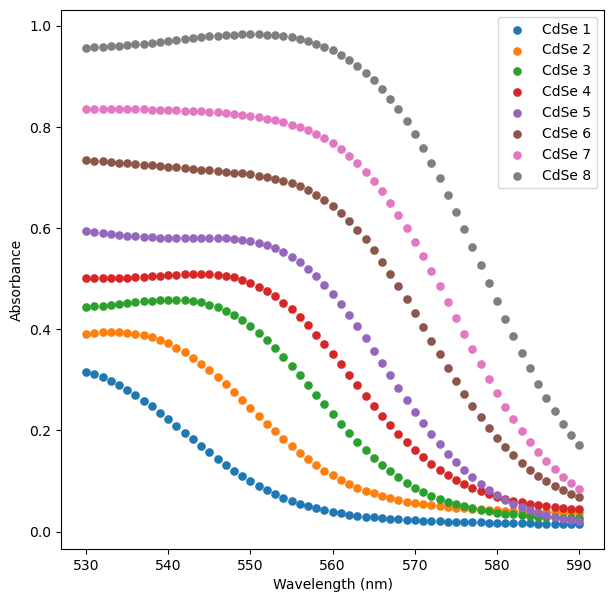

In [63]:
# Plotting UV-Vis Data (from 530 to 590 nm)
UVfiles =  glob.glob("C:/CdSeData/CdSe*.csv")
waveLen = []
absorbance = []
plotWaveLen = []
plotAbsorbance = []

uVisData = cleanAndExtractData (UVfiles, waveLen, 0, absorbance, 1, ",")

for i in range(len(UVfiles)):
    wL = []
    aB = []
    for w, a in zip(waveLen[i], absorbance[i]):
        if w >= 530 and w <= 590:
            wL.append(w)
            aB.append(a)
    plotWaveLen.append(wL)
    plotAbsorbance.append(aB)

plt.figure(figsize=(7,7))
for i in range(len(UVfiles)):
    plt.scatter(plotWaveLen[i], plotAbsorbance[i], label=f'CdSe {i+1}', s=27) 
    plt.legend()  
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance")
plt.plot()

In [ ]:
# Plotting linear range and calculate linear fit values
cdSe1 = linearFitAndPlot (plotWaveLen[0], plotAbsorbance[0], 538, 550)
cdSe2 = linearFitAndPlot (plotWaveLen[1], plotAbsorbance[1], 545, 557)
cdSe3 = linearFitAndPlot (plotWaveLen[2], plotAbsorbance[2], 552, 562)
cdSe4 = linearFitAndPlot (plotWaveLen[3], plotAbsorbance[3], 557, 567)
cdSe5 = linearFitAndPlot (plotWaveLen[4], plotAbsorbance[4], 562, 570)
cdSe6 = linearFitAndPlot (plotWaveLen[5], plotAbsorbance[5], 565, 575)
cdSe7 = linearFitAndPlot (plotWaveLen[6], plotAbsorbance[6], 570, 580)
cdSe8 = linearFitAndPlot (plotWaveLen[7], plotAbsorbance[7], 570, 583)
extraWaveLen = [cdSe1, cdSe2, cdSe3, cdSe4, cdSe5, cdSe6, cdSe7, cdSe8]

In [51]:
# Set up constant and list holder for radii calculations (both Fluorescence and UV-Vis)
enerGround = 1.751 * const.e
enerBulk = const.h * const.c / (709 * 1e-9)
m_h = 4.1 * 1e-31
corectFact = 10.62 
me = 0.13
mh = 0.45

enerNanoList = []
radiUVisList = []

enerExitonList = []
radiFluoList = []

In [53]:
# Calculate radius based on Fluorescence data
a = (pow(const.h, 2)/8)*((1/const.m_e)+(1/m_h))
b = -1.8*pow(const.e,2)/(4*const.pi*const.epsilon_0*corectFact)

for w in waveLenMaxInt:
     enerTranst = const.h * const.c / (w * 1e-9)
     enerExitonList.append(enerTranst - enerGround)

for enerExiton in enerExitonList:
    coefficients = [a, b, - enerExiton] 
    radi = np.roots(coefficients)
    radiFluoList.append(round((1/radi[0])*1e9, 2))

In [55]:
# Calculate radius based on UV-Vis data
for w in extraWaveLen:
    enerNano = const.h * const.c / (w * 1e-9)
    enerNanoList.append(enerNano)

for eNano in enerNanoList: 
    radiUVis = ((-1.8*pow(const.e,2)/(4*const.pi*const.epsilon_0*corectFact))
+ math.sqrt(pow((1.8*pow(const.e,2)/(4*const.pi*const.epsilon_0*corectFact)), 2)
            + (eNano - enerBulk) * (pow(const.h, 2) / (2 * const.m_e)) * 
            ((1/me) + (1/mh)))) / (2 * (eNano - enerBulk ))
    radiUVisList.append(round(radiUVis*1e9,2))

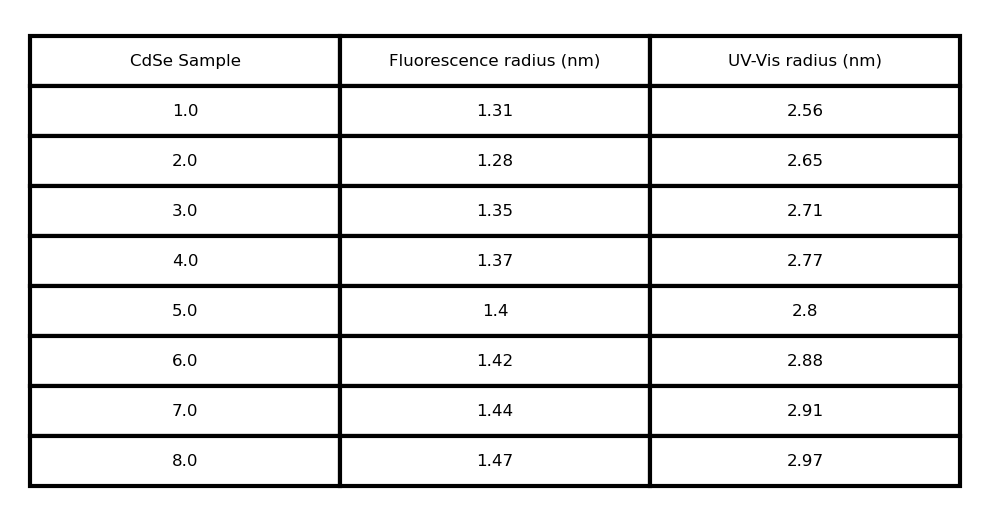

In [57]:
# Generate comparison table between 2 calculation approaches
dataSum = {"CdSe Sample": list(range(1,9)),
           "Fluorescence radius (nm)": radiFluoList,
           "UV-Vis radius (nm)": radiUVisList}      

df = pd.DataFrame(dataSum)

fig, ax = plt.subplots(figsize=(4, 2), dpi=300) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')     
plt.show() 

Text(0.5, 1.0, 'UV-Vis Data')

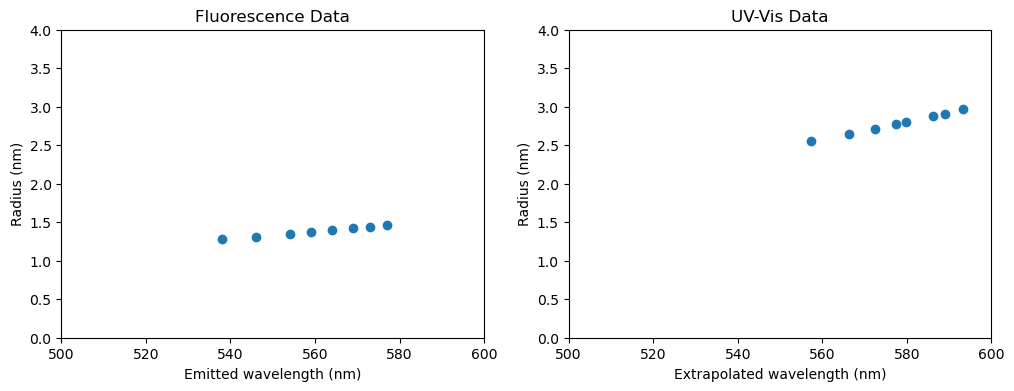

In [59]:
# Generate wavelength vs. radii plots for both approaches     
plt.figure(figsize=(12,4)) 
 
plt.subplot(1,2,1)
plt.scatter(waveLenMaxInt, radiFluoList)
plt.xlim(500,600)
plt.ylim(0,4)
plt.xlabel('Emitted wavelength (nm)')
plt.ylabel('Radius (nm)')
plt.title('Fluorescence Data') 

plt.subplot(1,2,2)
plt.scatter(extraWaveLen, radiUVisList) 
plt.xlim(500,600)
plt.ylim(0,4)
plt.xlabel('Extrapolated wavelength (nm)')
plt.ylabel('Radius (nm)')
plt.title('UV-Vis Data') 